# `pseudo_gravity_packing`
This is a form of random sequential addition (`rsa`) that mimics gravity by always putting the next sphere at the lowest possible location.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
import inspect
inspect.signature(ps.generators.pseudo_gravity_packing)

<Signature (im, r, clearance=0, axis=0, maxiter=1000, edges='contained')>

## `im`
The image into which the spheres should be inserted.  Spheres will be inserted into the ``True`` locations, as if these  indicate void space.

  0%|          | 0/100 [00:00<?, ?it/s]

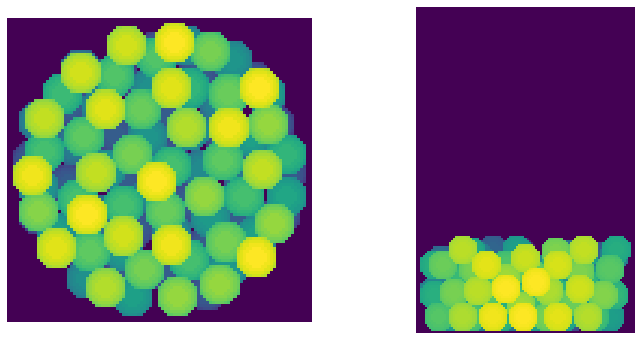

In [2]:
im = ps.generators.cylindrical_plug(shape=[151, 101, 101], axis=0)
packing = ps.generators.pseudo_gravity_packing(im=im, r=8, maxiter=100)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(ps.visualization.sem(~packing), interpolation='none', origin='lower')
ax[0].axis(False)
ax[1].imshow(ps.visualization.sem(~packing, axis=2).T, interpolation='none', origin='lower')
ax[1].axis(False);

## `r`
The radius of the spheres to add:

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

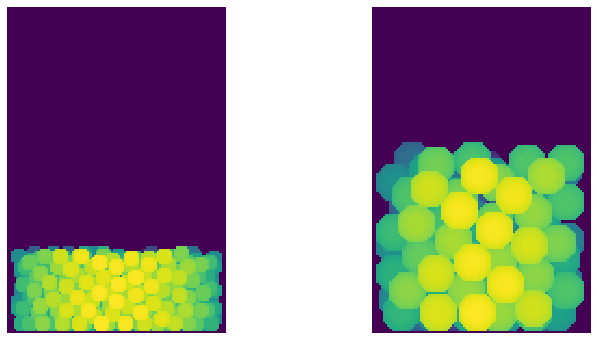

In [3]:
fig, ax = plt.subplots(1, 2, figsize=[12, 6])

r = 5
im = ps.generators.cylindrical_plug(shape=[151, 101, 101], axis=0)
packing = ps.generators.pseudo_gravity_packing(im=im, r=r, maxiter=500)
ax[0].imshow(ps.visualization.sem(~packing, axis=2).T, interpolation='none', origin='lower')
ax[0].axis(False)

r = 10
im = ps.generators.cylindrical_plug(shape=[151, 101, 101], axis=0)
packing = ps.generators.pseudo_gravity_packing(im=im, r=r, maxiter=100)
ax[1].imshow(ps.visualization.sem(~packing, axis=2).T, interpolation='none', origin='lower')
ax[1].axis(False);

## `clearance`
The spheres can be forced to have some spacing between them by setting ``clearance > 0``, or they can overlap if ``clearance < 0``:

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

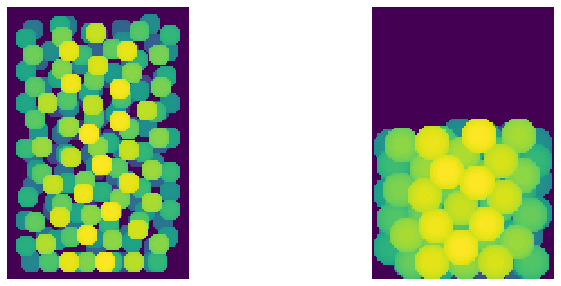

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])

im = ps.generators.cylindrical_plug(shape=[151, 101, 101], axis=0)
packing = ps.generators.pseudo_gravity_packing(im=im, r=r, clearance=3, maxiter=500)
ax[0].imshow(ps.visualization.sem(~packing, axis=2).T, interpolation='none', origin='lower')
ax[0].axis(False)

im = ps.generators.cylindrical_plug(shape=[151, 101, 101], axis=0)
packing = ps.generators.pseudo_gravity_packing(im=im, r=r, clearance=-1, maxiter=100)
ax[1].imshow(ps.visualization.sem(~packing, axis=2).T, interpolation='none', origin='lower')
ax[1].axis(False);

## `axis` 
Controls the direction of gravity.  The default is 0, which means the spheres fall towards the x=0 axis.

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

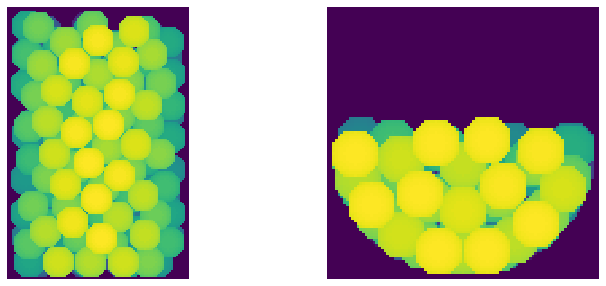

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])

im = ps.generators.cylindrical_plug(shape=[151, 101, 101], axis=0)
packing = ps.generators.pseudo_gravity_packing(im=im, r=r, axis=0, maxiter=500)
ax[0].imshow(ps.visualization.sem(~packing, axis=2).T, interpolation='none', origin='lower')
ax[0].axis(False)

im = ps.generators.cylindrical_plug(shape=[151, 101, 101], axis=0)
packing = ps.generators.pseudo_gravity_packing(im=im, r=r, axis=2, maxiter=100)
ax[1].imshow(ps.visualization.sem(~packing, axis=0).T, interpolation='none', origin='lower')
ax[1].axis(False);

## `maxiter`
The maximum number of spheres to add.  Limiting this number can ensure the process does not take too long if the image is large, as well allow for partial filling of the image.

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

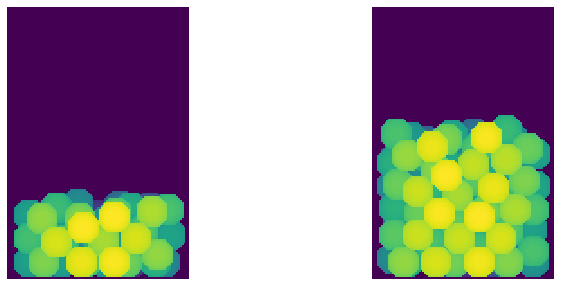

In [6]:
fig, ax = plt.subplots(1, 2, figsize=[12, 5])

im = ps.generators.cylindrical_plug(shape=[151, 101, 101], axis=0)
packing = ps.generators.pseudo_gravity_packing(im=im, r=r, maxiter=50)
ax[0].imshow(ps.visualization.sem(~packing, axis=2).T, interpolation='none', origin='lower')
ax[0].axis(False)

im = ps.generators.cylindrical_plug(shape=[151, 101, 101], axis=0)
packing = ps.generators.pseudo_gravity_packing(im=im, r=r, maxiter=100)
ax[1].imshow(ps.visualization.sem(~packing, axis=2).T, interpolation='none', origin='lower')
ax[1].axis(False);